### Importing the required libraries:

In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

!pip install --quiet shap==0.39.0
import shap

### Loading the Data

In [3]:
df_acc = pd.read_csv("../Dataset/RTA Dataset.csv")
df_acc.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Exploratory Data Analysis

In [4]:
df_acc.shape

(12316, 32)

In [5]:
df_acc.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
for col in df_acc.columns:
  print(df_acc[col].unique())

['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
['Male' 'Female' 'Unknown']
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
['Employee' 'Unknown' 'Owner' nan 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Unkn

* Replace na and unknown values with null objects 

In [7]:
unks = ['na','unknown','Unknown','nan']

df_acc.replace(unks, np.nan, inplace = True)
df_acc.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         593
Driving_experience              862
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction              1078
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

* Removing columns with more that 50% of null values

In [8]:
def removeNulls(dataframe, percent=0.5):
    df = dataframe.copy()
    ishape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    print(colnames)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped: ",len(colnames))
    print("Old dataset columns",ishape,"New dataset columns",df.shape)
    return df

In [9]:
df_acc = removeNulls(df_acc,percent = 0.5)

['Service_year_of_vehicle']
Number of Columns dropped:  1
Old dataset columns (12316, 32) New dataset columns (12316, 31)


* Checking again for all the unique values

In [10]:
for col in df_acc.columns:
  print(df_acc[col].unique())

['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Re

* Merging values NormalNormal and Normal in Fitness_of_Casuality as they represents the same.

In [11]:
df_acc =df_acc.replace('NormalNormal','Normal')
df_acc['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind'], dtype=object)

* As minutes and seconds doesnt matter in the accident severity, concentrating on the hour slot

In [12]:
df_acc['Time'] =df_acc.Time.str.split(':').str[0] 
df_acc['Time'].unique()

array(['17', '1', '14', '22', '8', '15', '12', '18', '13', '20', '16',
       '21', '9', '10', '19', '11', '23', '7', '0', '5', '6', '4', '3',
       '2'], dtype=object)

* Replacing the null values with mode values

In [13]:
df_acc=df_acc.fillna(df_acc.mode().iloc[0])
df_acc.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,No defect,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,No defect,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,No defect,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


* Checking columns with any null values

In [14]:
df_acc.isna().any().sum()

0

* Plotting each column for analysis

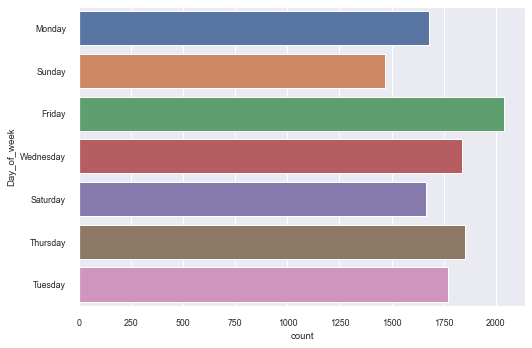

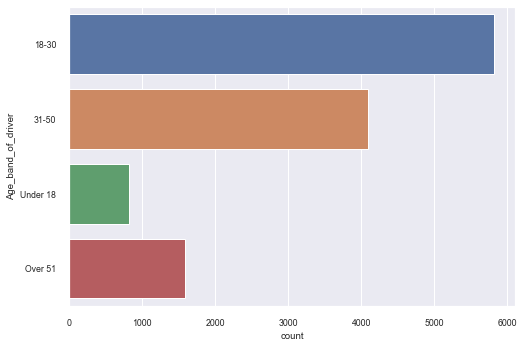

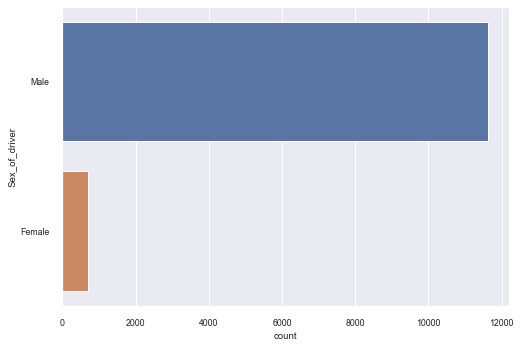

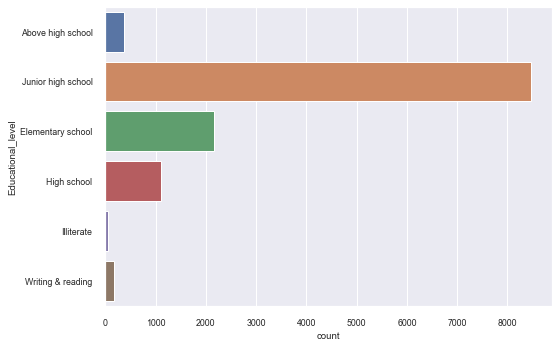

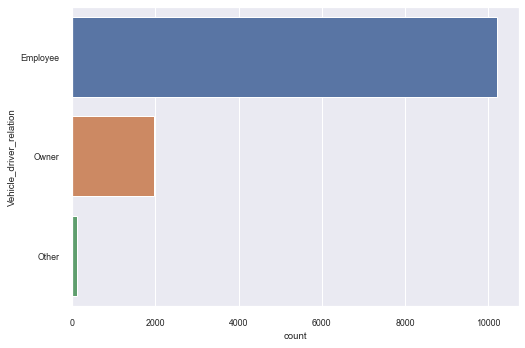

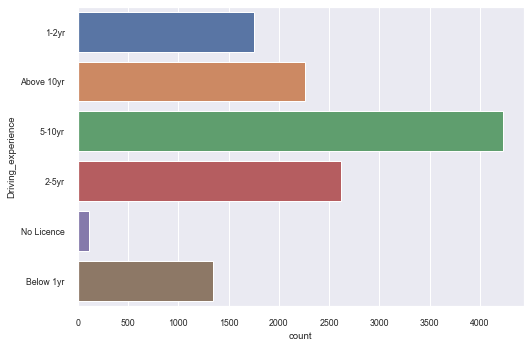

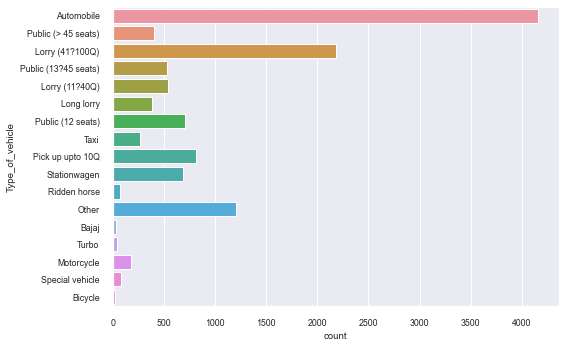

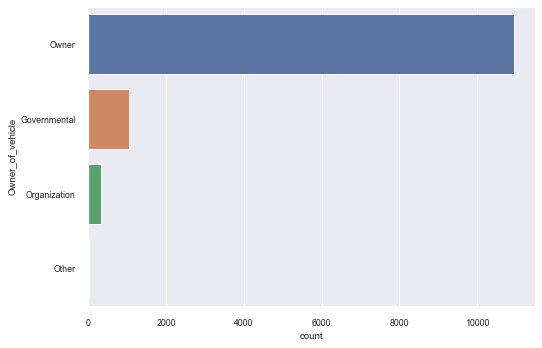

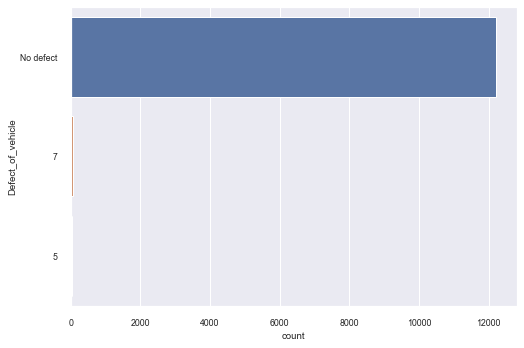

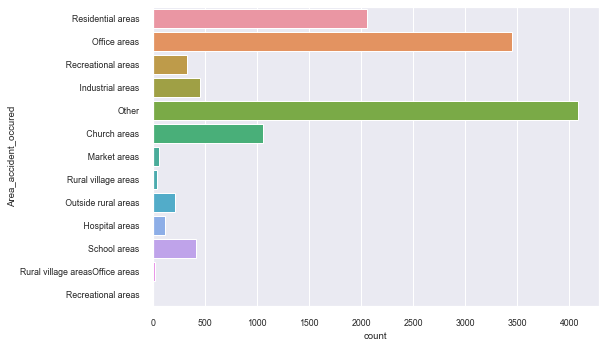

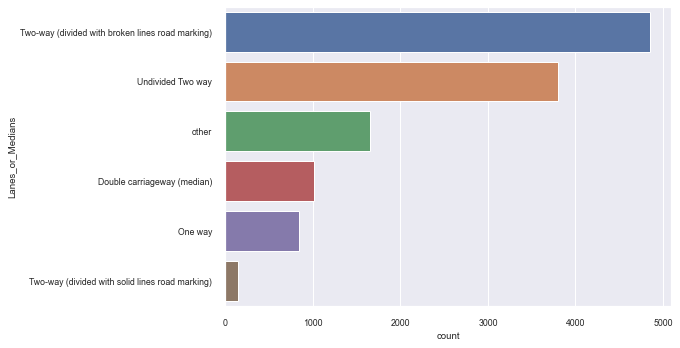

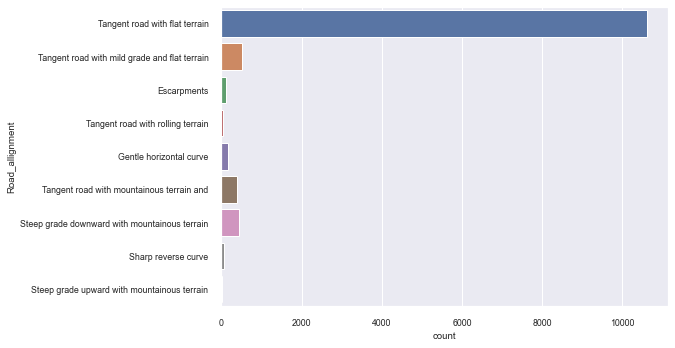

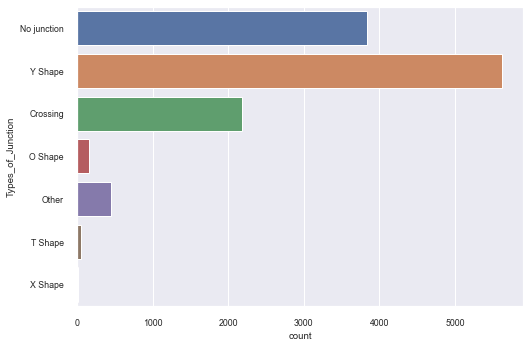

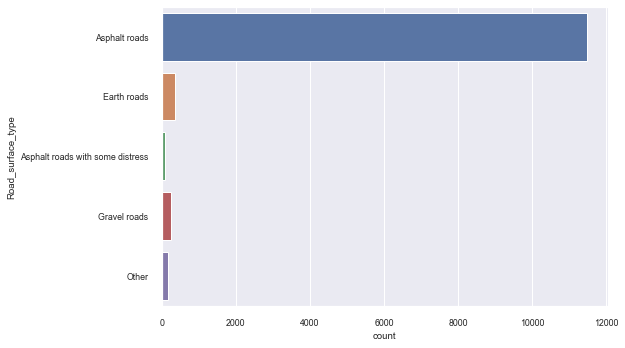

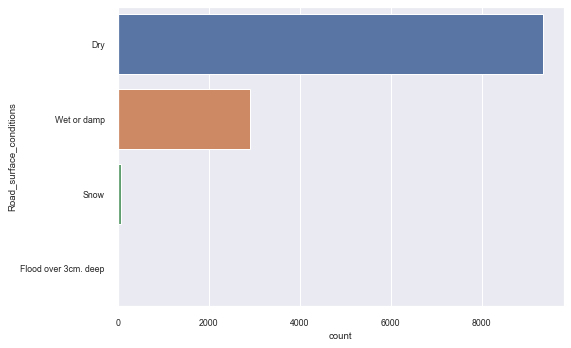

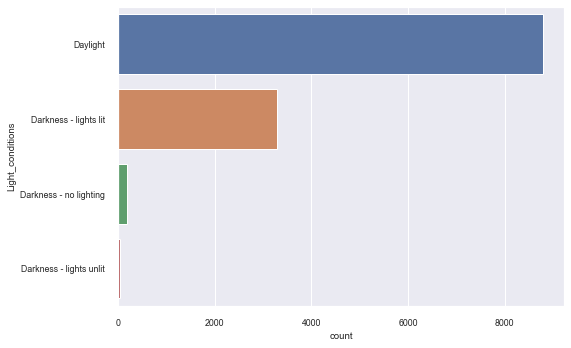

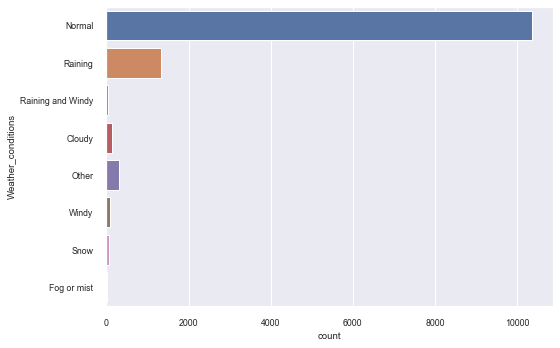

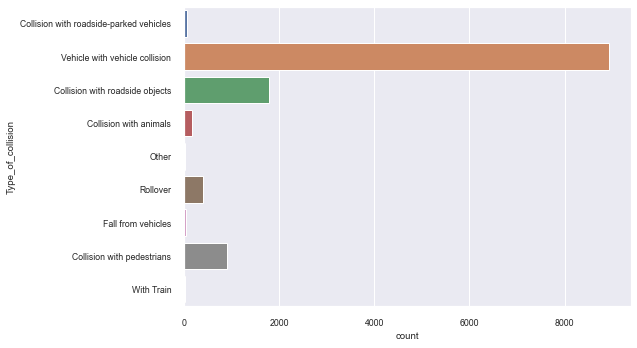

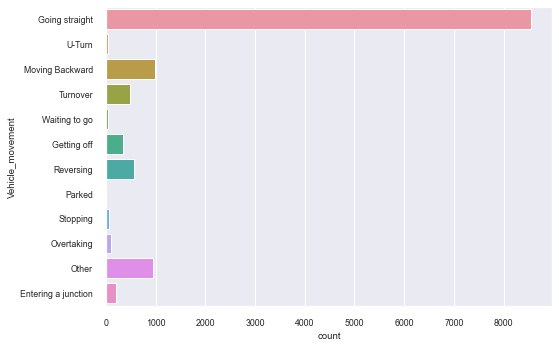

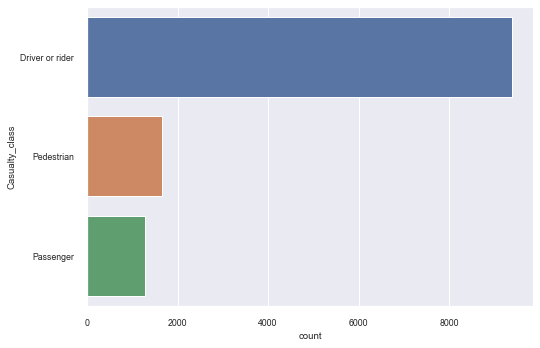

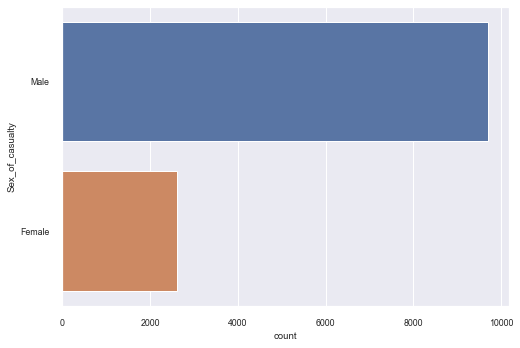

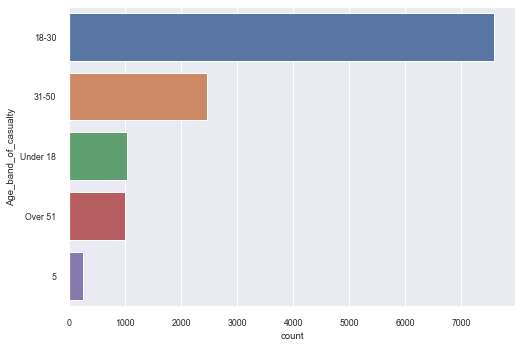

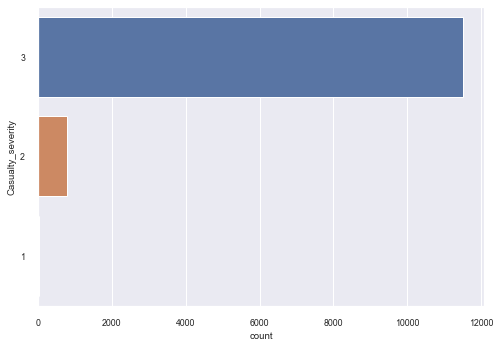

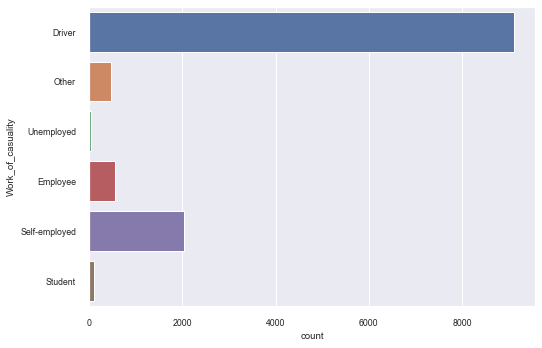

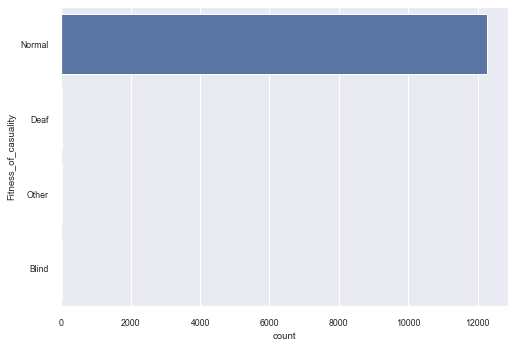

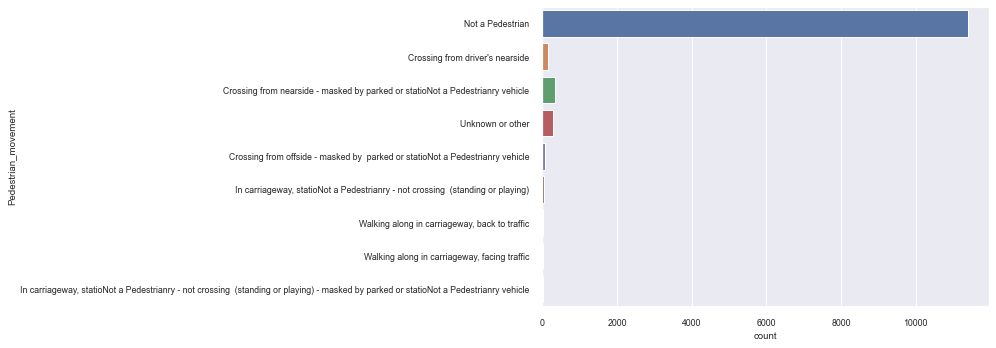

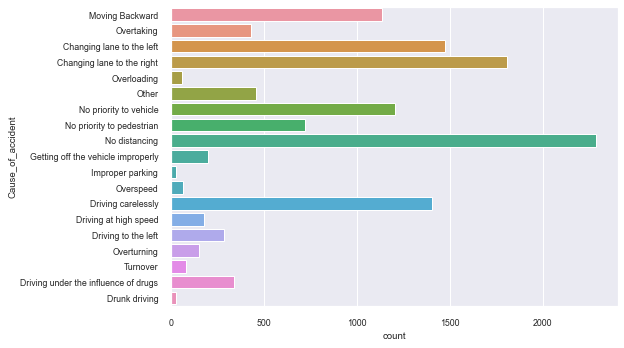

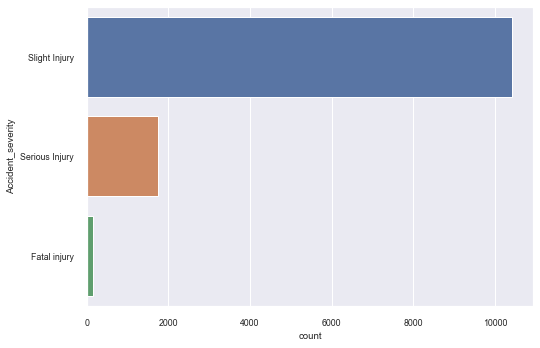

In [192]:
for column in df_acc.select_dtypes(include='object'):
  if df_acc[column].nunique() < 20:
    sns.countplot(y=column,data=df_acc,)
    plt.show()

Observations made:

*   Mostly the casualty is an employed driver that too of a personal transport.
*   Accident instigator is mostly with 18-30 age band with junior high school education.
*   Merging lanes and two-ways(divided and un-divided) lanes are the prime locations of the mishaps.
*   Usually the day-time is a most probable one with evening peak time.
*   Frequently, more than 2-vehicles are involved. 
*   2-4 vehicles has the most number of casualities.
*   No of vehicles in an accident is the highest correlated to the accident severity.
*   Slight Injury class has more entries than the other two(Serious Injury and Fatal Injury) classes. Hence, the available dataset seems to be imbalanced and can cause overfitting to the majority class.

General distribution of data

In [15]:
df_acc.describe(include='object').transpose()

,count,unique,top,freq
Time,12316,24,17,1228
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,4,18-30,5819
Sex_of_driver,12316,2,Male,11615
Educational_level,12316,6,Junior high school,8460
Vehicle_driver_relation,12316,3,Employee,10220
Driving_experience,12316,6,5-10yr,4225
Type_of_vehicle,12316,17,Automobile,4155
Owner_of_vehicle,12316,4,Owner,10941
Defect_of_vehicle,12316,3,No defect,12204


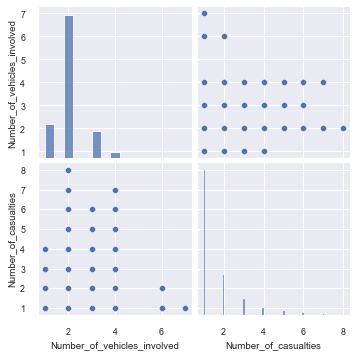

In [194]:
sns.pairplot(df_acc)

### Pre-processing

* Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
cols = df_acc.loc[:, ~df_acc.columns.isin(['Number_of_casualties','Number_of_vehicles_involved'])].columns
for col in cols:
  df_acc[col] = lbl_encoder.fit_transform(df_acc[col]) 

* Plotting Heatmap for correlation

<AxesSubplot:>

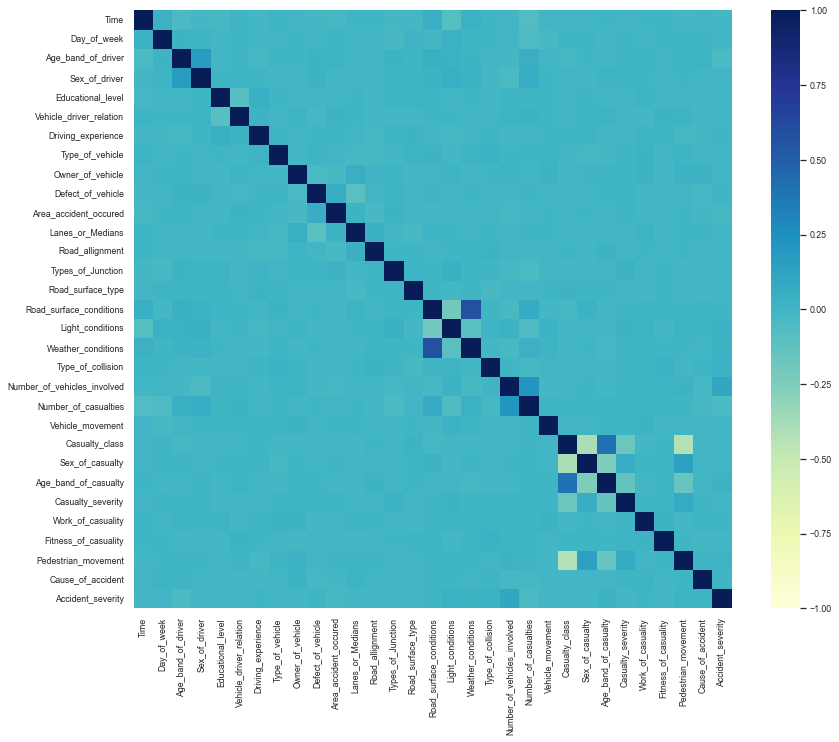

In [17]:
plt.figure(figsize=(14,11))
sns.set(font_scale=0.8)
sns.heatmap(df_acc.corr(), linewidths=0, vmin=-1, vmax=1, cmap ='YlGnBu', square = True, cbar=True)

In [18]:
def rem_highly_correlated(df):
  cor_matrix = df.corr().abs()
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
  print(to_drop)
  df1 = df.drop(df.columns[to_drop], axis=1)
  return df1

In [19]:
df_acc = rem_highly_correlated(df_acc)

[]


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [20]:
df_acc.shape

(12316, 31)

In [21]:
def print_less_impactful(df):
  cor_matrix = df.corr()
  upper_tri = cor_matrix['Accident_severity']
  print(upper_tri.sort_values(axis=0))
  pass

In [22]:
print_less_impactful(df_acc)

Age_band_of_driver            -0.046447
Number_of_casualties          -0.045339
Area_accident_occured         -0.017308
Lanes_or_Medians              -0.013926
Time                          -0.013560
Fitness_of_casuality          -0.012858
Vehicle_driver_relation       -0.012428
Owner_of_vehicle              -0.010960
Vehicle_movement              -0.010885
Casualty_severity             -0.010531
Types_of_Junction             -0.009880
Sex_of_casualty               -0.009290
Road_allignment               -0.005967
Road_surface_type             -0.004510
Type_of_vehicle               -0.003709
Sex_of_driver                 -0.002756
Day_of_week                   -0.002730
Casualty_class                -0.001312
Educational_level             -0.001227
Defect_of_vehicle              0.001889
Driving_experience             0.002146
Work_of_casuality              0.002306
Road_surface_conditions        0.004579
Cause_of_accident              0.007311
Pedestrian_movement            0.013082


* Chi-Square Test to detect relationship between two variables

In [23]:
from sklearn.feature_selection import chi2
resultant = pd.DataFrame(data=[(0 for i in range(len(df_acc.columns))) for i in range(len(df_acc.columns))], 
                         columns=list(df_acc.columns))
resultant.set_index(pd.Index(list(df_acc.columns)), inplace = True)

for i in list(df_acc.columns):
    for j in list(df_acc.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df_acc[i]).reshape(-1, 1), np.array(df_acc[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant['Accident_severity'])

Time                           6.574078e-04
Day_of_week                    9.239380e-01
Age_band_of_driver             1.941888e-07
Sex_of_driver                  9.412754e-01
Educational_level              9.020698e-01
Vehicle_driver_relation        5.218492e-02
Driving_experience             8.965577e-02
Type_of_vehicle                5.834272e-01
Owner_of_vehicle               5.757216e-01
Defect_of_vehicle              9.903809e-01
Area_accident_occured          1.816445e-01
Lanes_or_Medians               1.567314e-01
Road_allignment                9.361633e-01
Types_of_Junction              2.045936e-01
Road_surface_type              3.027591e-02
Road_surface_conditions        7.352450e-01
Light_conditions               3.218542e-04
Weather_conditions             4.917897e-01
Type_of_collision              1.340999e-02
Number_of_vehicles_involved    1.573012e-06
Number_of_casualties           7.221136e-15
Vehicle_movement               3.452941e-01
Casualty_class                 5

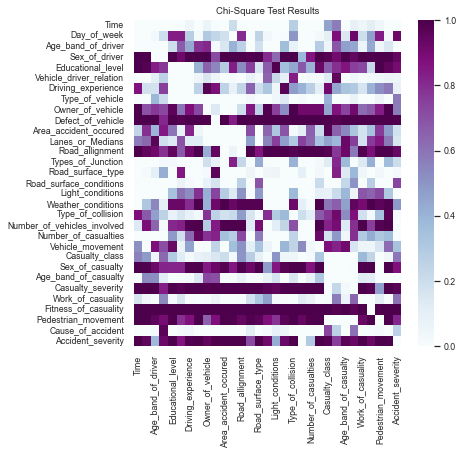

In [24]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=False, cmap='BuPu')
plt.title('Chi-Square Test Results')
plt.show()

In [25]:
cols=['Age_band_of_driver', 'Number_of_casualties' ,'Area_accident_occured', 'Lanes_or_Medians','Time', 'Vehicle_driver_relation',
    'Road_surface_type','Driving_experience', 'Age_band_of_casualty', 'Light_conditions', 'Type_of_collision', 'Number_of_vehicles_involved','Accident_severity']
df_acc = df_acc[cols]
df_acc.columns

Index(['Age_band_of_driver', 'Number_of_casualties', 'Area_accident_occured',
       'Lanes_or_Medians', 'Time', 'Vehicle_driver_relation',
       'Road_surface_type', 'Driving_experience', 'Age_band_of_casualty',
       'Light_conditions', 'Type_of_collision', 'Number_of_vehicles_involved',
       'Accident_severity'],
      dtype='object')

* one hot encoding

In [205]:
df_acc = pd.concat([df_acc,pd.get_dummies(df_acc["Number_of_vehicles_involved"], prefix="Tot_Vehicles_" )], axis=1)
df_acc.drop(columns=['Number_of_vehicles_involved'])

,Age_band_of_driver,Number_of_casualties,Area_accident_occured,Lanes_or_Medians,Time,Vehicle_driver_relation,Road_surface_type,Driving_experience,Age_band_of_casualty,Light_conditions,Type_of_collision,Accident_severity,Tot_Vehicles__1,Tot_Vehicles__2,Tot_Vehicles__3,Tot_Vehicles__4,Tot_Vehicles__6,Tot_Vehicles__7
0,0,2,9,2,9,0,0,0,0,3,3,2,0,1,0,0,0,0
1,1,2,6,4,9,0,0,3,0,3,7,2,0,1,0,0,0,0
2,0,2,1,5,9,0,0,0,1,3,2,1,0,1,0,0,0,0
3,0,2,6,5,1,0,2,2,0,0,7,2,0,1,0,0,0,0
4,0,2,4,5,1,0,0,1,0,0,7,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,5,4,8,0,0,1,0,3,7,2,0,1,0,0,0,0
12312,0,1,5,2,10,0,0,2,0,3,7,2,0,1,0,0,0,0
12313,2,1,5,2,5,0,0,2,1,3,7,1,1,0,0,0,0,0
12314,0,1,6,4,5,0,0,3,0,0,7,2,0,1,0,0,0,0


* Separating Target Variable

In [26]:
Feature=df_acc.drop(columns=['Accident_severity'], axis=1)
y=df_acc['Accident_severity']
Feature.head()

,Age_band_of_driver,Number_of_casualties,Area_accident_occured,Lanes_or_Medians,Time,Vehicle_driver_relation,Road_surface_type,Driving_experience,Age_band_of_casualty,Light_conditions,Type_of_collision,Number_of_vehicles_involved
0,0,2,9,2,9,0,0,0,0,3,3,2
1,1,2,6,4,9,0,0,3,0,3,7,2
2,0,2,1,5,9,0,0,0,1,3,2,2
3,0,2,6,5,1,0,2,2,0,0,7,2
4,0,2,4,5,1,0,0,1,0,0,7,2


In [27]:
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int32

* Scaling the input

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(Feature)
X[0:5]

array([[0.        , 0.14285714, 0.75      , 0.4       , 0.39130435,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.375     , 0.16666667, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.14285714, 0.5       , 0.8       , 0.39130435,
        0.        , 0.        , 0.6       , 0.        , 1.        ,
        0.875     , 0.16666667, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.08333333, 1.        , 0.39130435,
        0.        , 0.        , 0.        , 0.25      , 1.        ,
        0.25      , 0.16666667, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.5       , 1.        , 0.04347826,
        0.        , 0.5       , 0.4       , 0.        , 0.        ,
        0.875     , 0.16666667, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
    

* Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Feature, y, test_size=0.2, random_state=51)

* Oversampling the imbalanced data

In [29]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("Upsampled shape: ", X_train.shape)

Upsampled shape:  (24999, 12)


###Baseline Model

In [211]:
def trial_models(X_train,y_train,X_test, y_test):
  models =[]
  
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, knn.predict(X_train), average='weighted')
  print('======================')
  print('Trained KNN score {}'.format(train_f1))
  print('KNN score {}'.format(f1))
  models.append(knn)
  
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)
  pred = dt.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, dt.predict(X_train), average='weighted')
  print('======================')
  print('Trained DT score {}'.format(train_f1))
  print('DT score {}'.format(f1))
  models.append(dt)
  
  lr = LogisticRegression(max_iter=1000,random_state=7, solver='newton-cg')
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, lr.predict(X_train), average='weighted')
  print('======================')
  print('Trained LR score {}'.format(train_f1))
  print('LR score {}'.format(f1))
  models.append(lr)
  
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.accuracy_score(y_train, rf.predict(X_train))
  print('======================')
  print('Trained RF score {}'.format(train_f1))
  print('RF score {}'.format(f1))
  models.append(rf)

  multi = MultinomialNB()
  multi.fit(X_train, y_train)
  pred = multi.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, multi.predict(X_train), average='weighted')
  print('======================')
  print('Trained MNB score {}'.format(train_f1))
  print('MNB score {}'.format(f1))
  models.append(multi)

  clf = SVC(random_state=0)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, clf.predict(X_train), average='weighted')
  print('======================')
  print('Trained SVC score {}'.format(train_f1))
  print('SVC score {}'.format(f1))
  models.append(clf)


  gbc = GradientBoostingClassifier(random_state=0)
  gbc.fit(X_train, y_train)
  pred = gbc.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, gbc.predict(X_train), average='weighted')
  print('======================')
  print('Trained GBC score {}'.format(train_f1))
  print('GBC score {}'.format(f1))
  models.append(gbc)
 
  return models

In [212]:
models = trial_models(X_train,y_train,X_test, y_test)

Trained KNN score 0.8966190671888794
KNN score 0.6324577466834094
Trained DT score 0.9883416703972311
DT score 0.7107520075357598
Trained LR score 0.5490328632564261
LR score 0.7069233311959573
Trained RF score 0.9883595343813752
RF score 0.7590971280595907
Trained MNB score 0.49591027556928247
MNB score 0.5939563909907793


In [ ]:
print(models[0])
models[0].get_params()

KNeighborsClassifier()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
print(models[3])
models[3].get_params()

RandomForestClassifier()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter Tuning

* Hyper-parameter tuning for both Random Forest Classifier and Gradient Boosting Classifier 

In [30]:
skf = KFold(n_splits=5, shuffle=True, random_state=9)

rf = RandomForestClassifier(random_state=0)
params={'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 120, num = 120)]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
pred = grid_rf.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Random Forest params are {}'.format(grid_rf.best_params_))
print('Best f1-weighted score {}'.format(grid_rf.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Random Forest params are {'n_estimators': 101}
Best f1-weighted score 0.8906739174128235
F1_test set is 0.7471856880234208


In [33]:
skf = KFold(n_splits=4, shuffle=True, random_state=5)

knn = KNeighborsClassifier()
params = {'n_neighbors': [5,4,3]}
grid_knn = GridSearchCV(knn, param_grid=params, scoring ='f1_weighted', n_jobs=-1, cv=skf)
grid_knn.fit(X_train, y_train)
pred = grid_knn.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Gradient Boost params are {}'.format(grid_knn.best_params_))
print('Best f1-weighted score {}'.format(grid_knn.best_score_))
print('F1_test set is {}'.format(f1))

Gradient Boost params are {'n_neighbors': 3}
Best f1-weighted score 0.8431818101491653
F1_test set is 0.6894321960804943


* Fine-tuning the hyper-parameters of Random Forest Classifier

In [45]:
from numpy.ma.core import log2
skf = KFold(n_splits=3, shuffle=True, random_state=9)

rf = RandomForestClassifier(random_state=0)
params={'n_estimators': [int(x) for x in np.linspace(start = 60, stop = 80, num = 20)], 'min_weight_fraction_leaf':[0.0,0.2]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
pred = grid_rf.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Random Forest params are {}'.format(grid_rf.best_params_))
print('Best f1-weighted score {}'.format(grid_rf.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Random Forest params are {'min_weight_fraction_leaf': 0.0, 'n_estimators': 80}
Best f1-weighted score 0.8818638588671232
F1_test set is 0.7505666412400942


### Final model & Performance

In [47]:
final = RandomForestClassifier(random_state=0, min_weight_fraction_leaf=0.0,n_estimators=80)
final.fit(X_train, y_train)
pred_train = final.predict(X_train)
pred_test = final.predict(X_test)

print('Final Test F1-score = {}'.format(metrics.f1_score(y_test, pred_test, average='weighted')))

Final Test F1-score = 0.7505666412400942


In [48]:
print('=== TEST DATA ===')
print(metrics.classification_report(y_test, pred_test))

=== TEST DATA ===
              precision    recall  f1-score   support

           0       0.08      0.12      0.09        34
           1       0.22      0.26      0.23       348
           2       0.86      0.83      0.85      2082

    accuracy                           0.74      2464
   macro avg       0.39      0.40      0.39      2464
weighted avg       0.76      0.74      0.75      2464



In [46]:
#PREVIOUS MODEL --0.7978
# print('=== TEST DATA ===')
#print(metrics.classification_report(y_test, pred_test))

=== TEST DATA ===
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        34
           1       0.58      0.08      0.14       348
           2       0.85      0.99      0.92      2082

    accuracy                           0.85      2464
   macro avg       0.81      0.39      0.41      2464
weighted avg       0.82      0.85      0.80      2464



<AxesSubplot:>

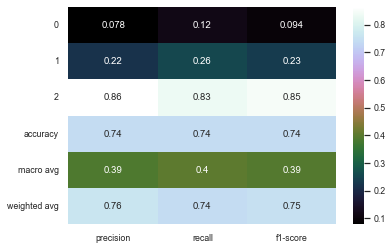

In [49]:
clf_report = metrics.classification_report(y_test, pred_test,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='cubehelix')

* With yellowbricks

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


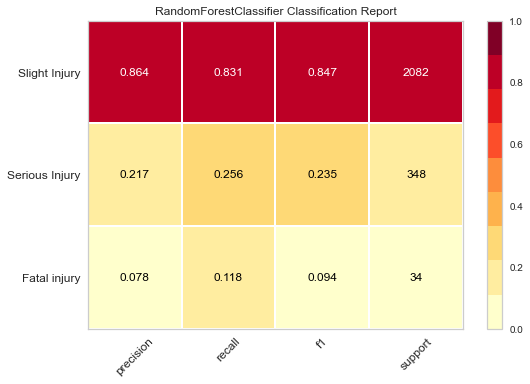

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [50]:
from yellowbrick.classifier import ClassificationReport

classes = ['Fatal injury', 'Serious Injury', 'Slight Injury' ]
visualizer = ClassificationReport(final, classes=classes, support=True)


visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Saving the RF model

In [51]:
import joblib
joblib.dump(final, '..\Model\RF_RTA02.pkl')

['..\\Model\\RF_RTA02.pkl']